# Standart imports

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

#Models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("data/car_data_preproccesed.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801,176,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301,101,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
2,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801,151,Beyaz,Sedan,Sahibinden,2. El,207000,148750
3,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801,101,Lacivert,Roadster,Galeriden,2. El,320000,42500
4,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301,101,Kırmızı,Sedan,Galeriden,2. El,183,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,Tofaş,Şahin,1.6,1994.0,Benzin/LPG,Düz Vites,1301,51,Beyaz,Sedan,Galeriden,2. El,121212,12250
2872,Tofaş,Şahin,Şahin 5 vites,1992.0,Benzin/LPG,Düz Vites,1301,76,Bej,Sedan,Sahibinden,2. El,54000,16300
2873,Tofaş,Doğan,SLX,1993.0,Benzin/LPG,Düz Vites,1301,76,Yeşil,Sedan,Sahibinden,2. El,135000,19000
2874,Tofaş,Kartal,Kartal 5 Vites,1991.0,Benzin/LPG,Düz Vites,1601,76,Kırmızı,Hatchback 5 Kapı,Galeriden,2. El,250000,11000


In [3]:
# Split data into X & y
X = df.drop("Fiyat", axis=1)
y = df["Fiyat"]

## Important
* We don't need to use SimpleImputer because we have already done that on data_preprocessing
* Also we don't have to use Pipeline, we can use ColumnTransformer directly, most important thing is we have to use fit_transform() to avoid data leak.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # this will help us fill missing values
from sklearn.preprocessing import OneHotEncoder # this will help us turn our categorical variables into numbers

# Define categorical columns
categorical_features = ["Marka", "Arac Tip Grubu", "Arac Tip", "Yakıt Turu", "Vites",
                        "Renk", "Kasa Tipi", "Kimden", "Durum"]

# Create categorical transformer (imputes missing values, then one hot encodes them)
# For this instance there is no missing values
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Define numeric features
numerical_features = ["Model Yıl", "Km"]
# Dont need to define numeric features because it's already numeric and there is no missing values
# But we will use it to sake of order
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

In [5]:
from sklearn.compose import ColumnTransformer

# Create a column transformer which combines all of the other transformer into one step
preprocessor = ColumnTransformer(
    transformers=[
        # (name, transformer_to_use, features_to_use transform)
        ("categorical", categorical_transformer, categorical_features),
        ("numerical", numerical_transformer, numerical_features)
    ])

In [6]:
from sklearn.model_selection import train_test_split

# Split data into train and test test
np.random.seed(27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [7]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".
regression_models = {"Ridge": Ridge(),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

In [8]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # Score the model pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(X_test, 
                                                          y_test)
    

Fitting Ridge...
Scoring Ridge...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [9]:
# Model scores
print(regression_results)

{'Ridge': 0.0469939801025232, 'SVR_rbf': -0.04103160007619833, 'RandomForestRegressor': 0.2854409168541453}


In [10]:
# As we can so above the best model is RandomForestRegressor
model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                ("model", RandomForestRegressor())])

model_pipeline.fit(X_train, y_train)

y_preds = model_pipeline.predict(X_test)


In [11]:
# Evaluate our model with different metrics
def evaluate_preds(y_true, y_preds):
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metric_dict = {"r2": round(r2, 2),
                  "mae": round(mae, 2),
                  "mse": round(mse, 2)}
    
    print(f"r^2 score : {r2 * 100:.2f}%")
    print(f"mean absolute error score : {mae}")
    print(f"mean squared error score : {mse}")
    
    return metric_dict

result = evaluate_preds(y_true=y_test, y_preds=y_preds)
print(result)

r^2 score : 58.56%
mean absolute error score : 16945.564379133597
mean squared error score : 2423547491.8099713
{'r2': 0.59, 'mae': 16945.56, 'mse': 2423547491.81}


In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validate our pipeline model
cross_val_score(model_pipeline, X_test, y_test).mean()

0.7566172154113596

## HyperParameter Tunning
* As we can see above our best model is Random Forest Regressor, now we will tune it.

### RandomizedSearchCV 
* We will use randomized search cv because random forest is an ensemble model and slow to train.
* If you want to try every combination of parameters, you need to use GridSearchCV.

In [32]:
# Setup hyperparameters
param_grid = {
    "model__n_estimators": np.arange(100, 1000, 100), # number of trees in the random forest
    "model__max_features" : ['auto', 'sqrt'], # number of features in consideration at every split
    "model__max_depth" : [int(x) for x in np.linspace(10, 120, num = 12)], # maximum number of levels allowed in each decision tree
    "model__min_samples_split" : [2, 6, 10], # minimum sample number to split a node
    "model__bootstrap" : [True, False]} # method used to sample data points

In [33]:
np.random.seed(27)
random_search_cv = RandomizedSearchCV(estimator=model_pipeline,
                                     param_distributions=param_grid,
                                     cv=5,
                                     n_iter=30,
                                     verbose=True)

In [34]:
# Fit the model
np.random.seed(27)
random_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0`

/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0`

/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ilker/miniconda3/envs/snowflakes/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0`

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Marka',
                                                                                'Arac '
                                                                                'Tip '
                                                                                'Grubu',
                                                                                'Arac '
                                                                                'Tip',
                                                                                'Yakıt '
                                                                                'Turu',
                                                                                'Vites',
                                                                                'Renk',
                                                                                'Kasa '
                                                                                'Tipi',
                                                                                'Kimden',
                                                                                'Durum']),
                                                                              ('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['Model '
                                                                                'Yıl',
                                                                                'Km'])])),
                                             ('model',
                                              RandomForestRegressor())]),
                   n_iter=30,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, 110, 120],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_split': [2, 6, 10],
                                        'model__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [35]:
#Best HyperParameters of our model
random_search_cv.best_params_

{'model__n_estimators': 600,
 'model__min_samples_split': 10,
 'model__max_features': 'sqrt',
 'model__max_depth': 110,
 'model__bootstrap': True}

In [36]:
random_search_cv.score(X_test, y_test)

0.7478404138636005

In [39]:
y_preds = random_search_cv.predict(X_test)
new_result = evaluate_preds(y_true=y_test, y_preds=y_preds)

r^2 score : 74.78%
mean absolute error score : 19643.972975581004
mean squared error score : 1474863323.0121393


In [41]:
# Comparison of metrics before & after HyperParameter Tunning
result, new_result

({'r2': 0.59, 'mae': 16945.56, 'mse': 2423547491.81},
 {'r2': 0.75, 'mae': 19643.97, 'mse': 1474863323.01})

* As we can see above our r^2 has increased 0.16, and mae, mse decreased..
* Mae means in average if a car's price is 100.000 our model estimates 119.643.. not bad at all

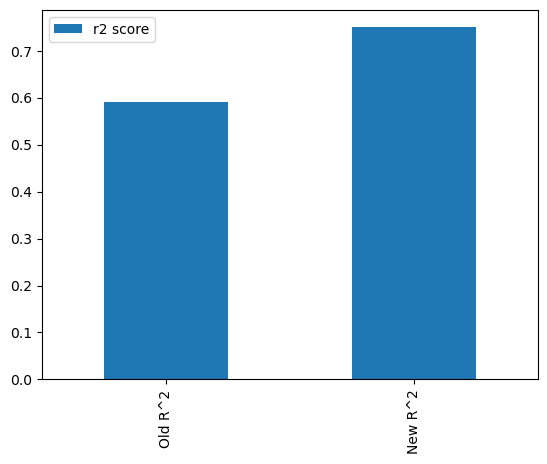

In [149]:
d = {"Old R^2": 0.59, "New R^2":0.75}
df = pd.DataFrame(data=d, index=["r2 score"])
df.T.plot.bar();

In [112]:
from joblib import dump, load
# Save the model to filea
dump(model, filename="car_reg_model_final.joblib")

['car_reg_model_final.joblib']

## Evaluate our model more visually

* Scatter Plot

In [123]:
d = {'True Label': np.array(y_test), 'Predicted Label': np.array(y_preds)}
df = pd.DataFrame(data=d)

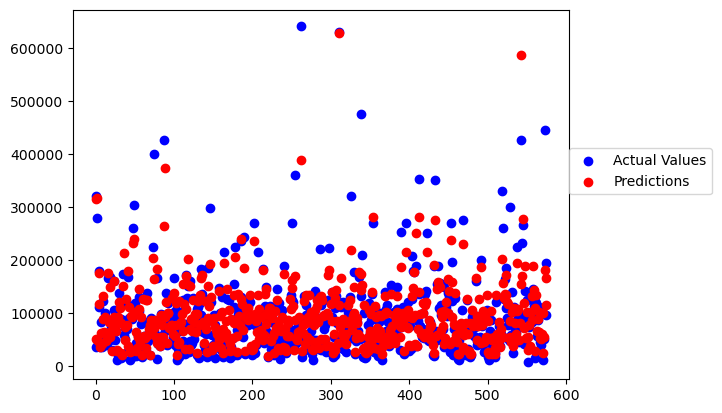

In [124]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["True Label"], c='b', label="Actual Values")
ax.scatter(x, df["Predicted Label"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

* Regression Line

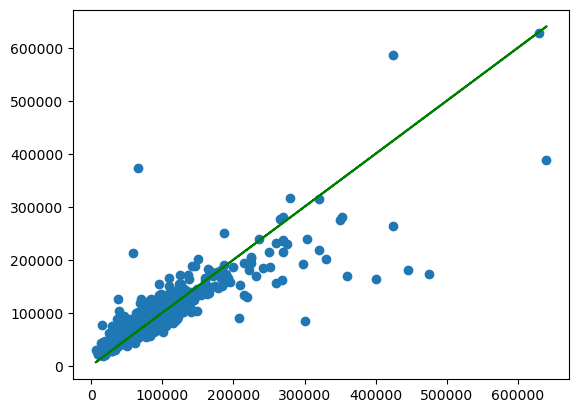

In [113]:
plt.scatter(y_test, y_preds)
plt.plot(y_test,y_test,color="g");